In [7]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from matplotlib import pyplot as plt

# Network topology

pop = 15000 #assume a population of 20000
days = 4*7
g = nx.erdos_renyi_graph(pop, 30/pop) #assume each person interacts with 10 people per day

# Model selection
model = ep.SEIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.031) #assume an Infection probability of 3.1%
cfg.add_model_parameter('gamma', 0.5) #prob of being quarantined once infected
cfg.add_model_parameter('alpha', 5/days) #assume an incubation period of 5 days. so chance of quarantine, but can spread
cfg.add_model_parameter("fraction_infected", 1/pop) 
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(days)


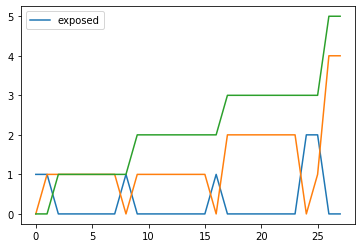

In [8]:
from matplotlib import pyplot as plt

x = range(days)

y1= [iterations[i]["node_count"][1] for i in x]
y2 = [iterations[i]["node_count"][2] for i in x]
y3 = [iterations[i]["node_count"][3] for i in x]

plt.plot(x,y1,label="exposed")
plt.plot(x,y2,label = "exposed")
plt.plot(x,y3,label = "removed")

plt.legend(["exposed"])